# Importing The Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)


In [2]:
data = pd.read_csv("Stars_Names.csv")
df = data.copy()
df.head()

,Name,Constellation,Bayern Designation,Designation,Approval Date
0,Acamar,Eridanus,θ1 Eridani A,HR 897,2016-07-20
1,Achernar,Eridanus,α Eridani A,HR 472,2016-06-30
2,Achird,Cassiopeia,η Cassiopeiae A,HR 219,2017-09-05
3,Acrab,Scorpius,β1 Scorpii Aa,HR 5984,2016-08-21
4,Acrux,Crux,α Crucis Aa,HR 4730,2016-07-20


# Data Cleaning and Processing

In [3]:
df.describe()

,Name,Constellation,Bayern Designation,Designation,Approval Date
count,336,335,335,336,336
unique,336,63,335,336,13
top,Wazn,Ursa Major,β Librae,HR 2040,2016-07-20
freq,1,18,1,1,67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                336 non-null    object
 1   Constellation       335 non-null    object
 2   Bayern Designation  335 non-null    object
 3   Designation         336 non-null    object
 4   Approval Date       336 non-null    object
dtypes: object(5)
memory usage: 13.3+ KB


Dropping the Duplicates if any

In [5]:
df.drop_duplicates(inplace = True)

## Changing Approved date column(Object) to DateTime column

In [6]:
df['Approval Date'] = pd.to_datetime(df['Approval Date'])

In [7]:
df['Approval year'] = df['Approval Date'].dt.year
df['Month'] = df['Approval Date'].dt.month


In [8]:
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['Approval month'] = df['Month'].map(month_map)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                336 non-null    object        
 1   Constellation       335 non-null    object        
 2   Bayern Designation  335 non-null    object        
 3   Designation         336 non-null    object        
 4   Approval Date       336 non-null    datetime64[ns]
 5   Approval year       336 non-null    int32         
 6   Month               336 non-null    int32         
 7   Approval month      336 non-null    object        
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 18.5+ KB


In [10]:
df.head()

,Name,Constellation,Bayern Designation,Designation,Approval Date,Approval year,Month,Approval month
0,Acamar,Eridanus,θ1 Eridani A,HR 897,2016-07-20,2016,7,July
1,Achernar,Eridanus,α Eridani A,HR 472,2016-06-30,2016,6,June
2,Achird,Cassiopeia,η Cassiopeiae A,HR 219,2017-09-05,2017,9,September
3,Acrab,Scorpius,β1 Scorpii Aa,HR 5984,2016-08-21,2016,8,August
4,Acrux,Crux,α Crucis Aa,HR 4730,2016-07-20,2016,7,July


## Removing Null Values

In [11]:
df.isnull().sum()

,0
Name,0
Constellation,1
Bayern Designation,1
Designation,0
Approval Date,0
Approval year,0
Month,0
Approval month,0


In [12]:
nullRows = df[df.isnull().any(axis=1)]
nullRows

,Name,Constellation,Bayern Designation,Designation,Approval Date,Approval year,Month,Approval month
78,Asterope,NaN,NaN,HR 1151,2016-08-21,2016,8,August


In [13]:
df.dropna(inplace = True)
df.shape

(335, 8)

### Amount of Stars per constellation

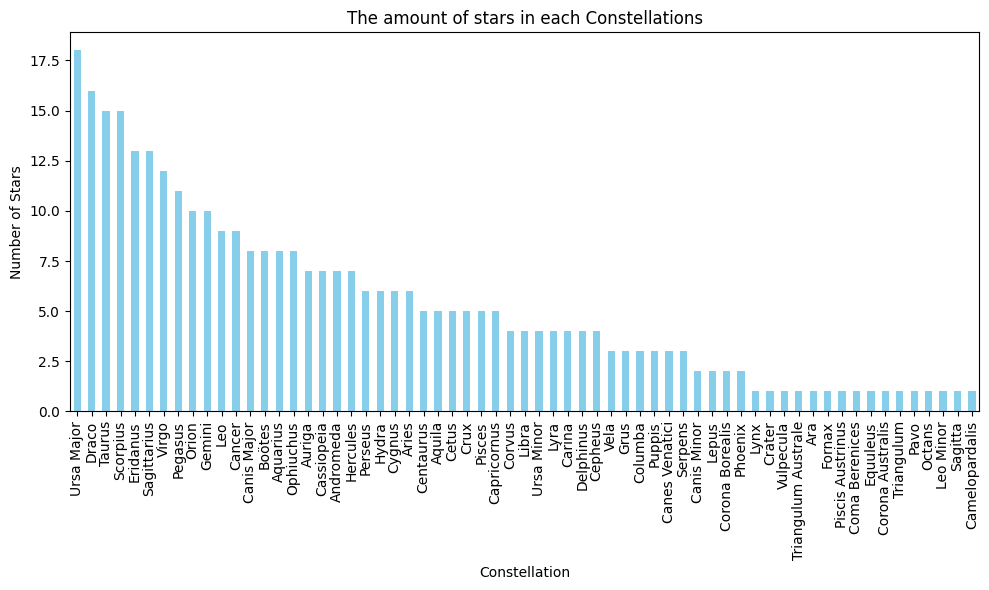

In [14]:
starCount = df.Constellation.value_counts()
plt.figure(figsize=(10, 6))
starCount.plot(kind='bar', color='skyblue')
plt.xlabel('Constellation')
plt.ylabel('Number of Stars')
plt.title('The amount of stars in each Constellations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Problem set 1 (Day-1)**


## **Easy**

---



---



 ### 1.Top 10 Constellations by Star Count

---



In [15]:
top_10Consellations=df["Constellation"].value_counts().head(10)
top_10Consellations
top_10Constellations_df=top_10Consellations.reset_index()

top_10Constellations_df.columns=["Constellations","Stars Count"]
print("Top 10 Constellations as Per Star count:")
top_10Constellations_df

Top 10 Constellations as Per Star count:


,Constellations,Stars Count
0,Ursa Major,18
1,Draco,16
2,Taurus,15
3,Scorpius,15
4,Eridanus,13
5,Sagittarius,13
6,Virgo,12
7,Pegasus,11
8,Orion,10
9,Gemini,10


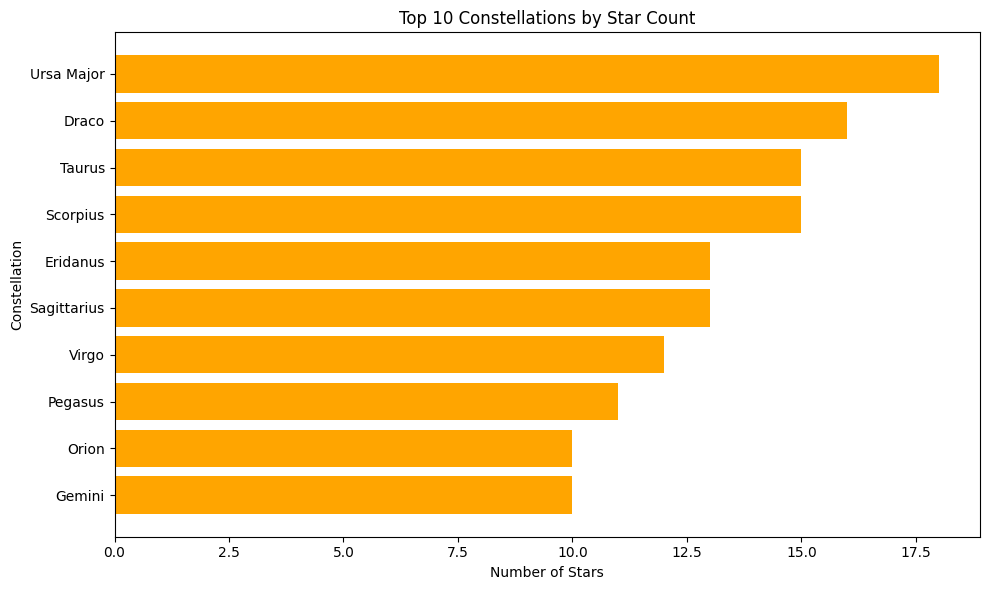

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(top_10Consellations.index, top_10Consellations.values, color='orange')
plt.gca().invert_yaxis()

plt.title('Top 10 Constellations by Star Count')
plt.xlabel('Number of Stars')
plt.ylabel('Constellation')
plt.tight_layout()
plt.show()

### 2.Stars Approved per year

---



In [17]:
stars_approved_perYear = df['Approval year'].value_counts()
stars_approved_perYear_df = stars_approved_perYear.reset_index()
stars_approved_perYear_df.columns = ['years', 'Star count']
stars_approved_perYear_df

,years,Star count
0,2016,207
1,2017,86
2,2018,23
3,2015,19


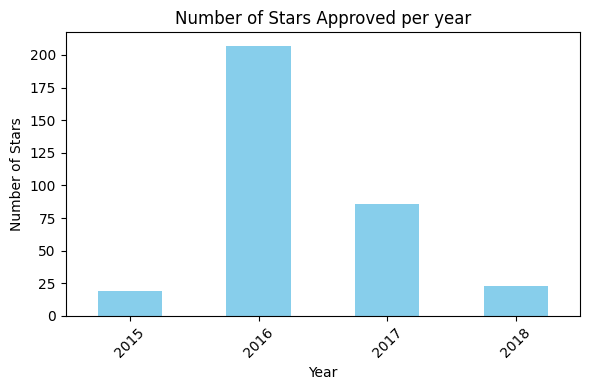

In [18]:
year_counts = df['Approval year'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
year_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Stars')
plt.title('Number of Stars Approved per year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Medium**

---



---



### 1.Heatmap of Approvals by Year and Month

---



We first created a pivot table to form a 2D matrix with years as rows and months as columns, where each cell represents the number of approvals for the corresponding year and month.

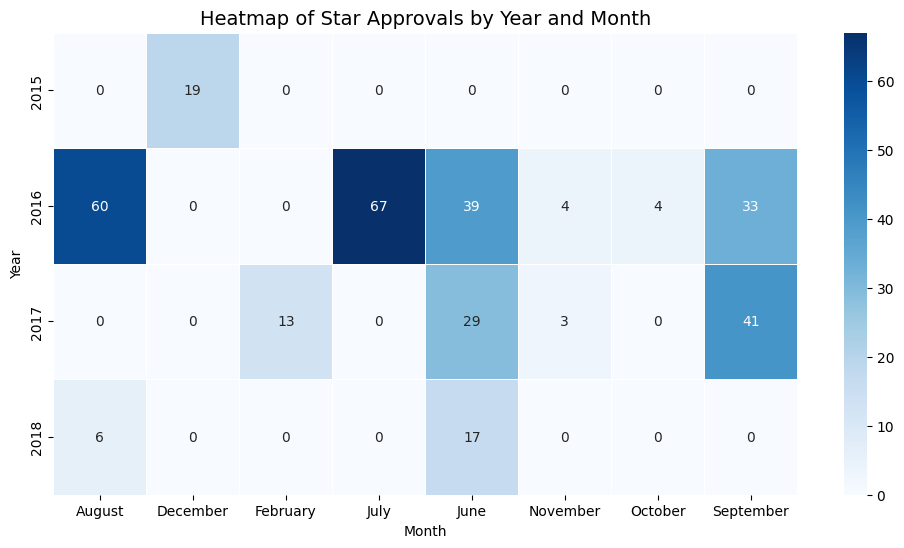

In [19]:
pivot_table = df.pivot_table(index='Approval year', columns='Approval month', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Star Approvals by Year and Month', fontsize=14)
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

### 2.Boxplot for Month vs Year

---



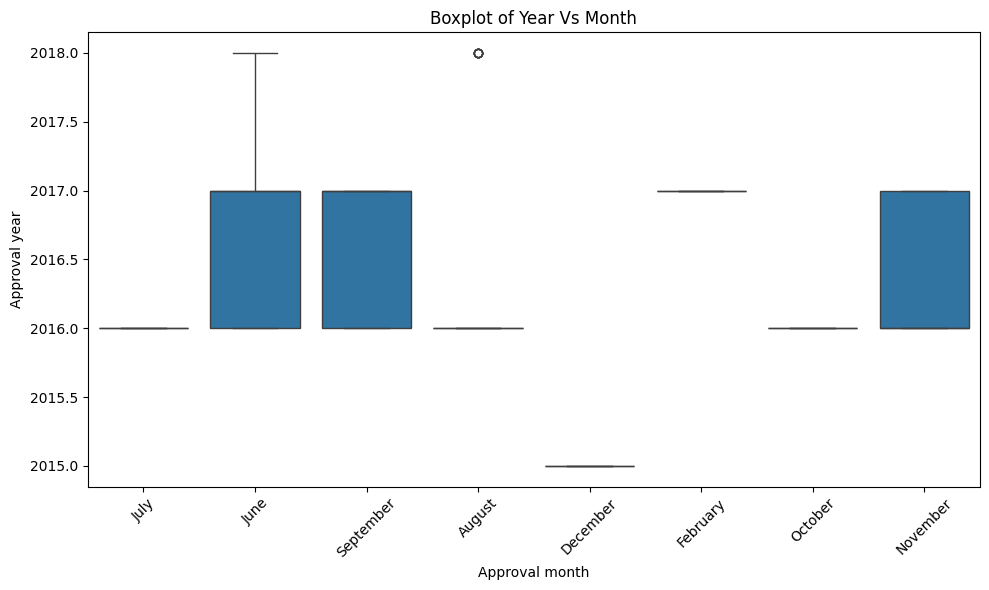

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Approval month', y='Approval year', data=df)
plt.title('Boxplot of Year Vs Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.Scatter Plot of Approval for month and year

---



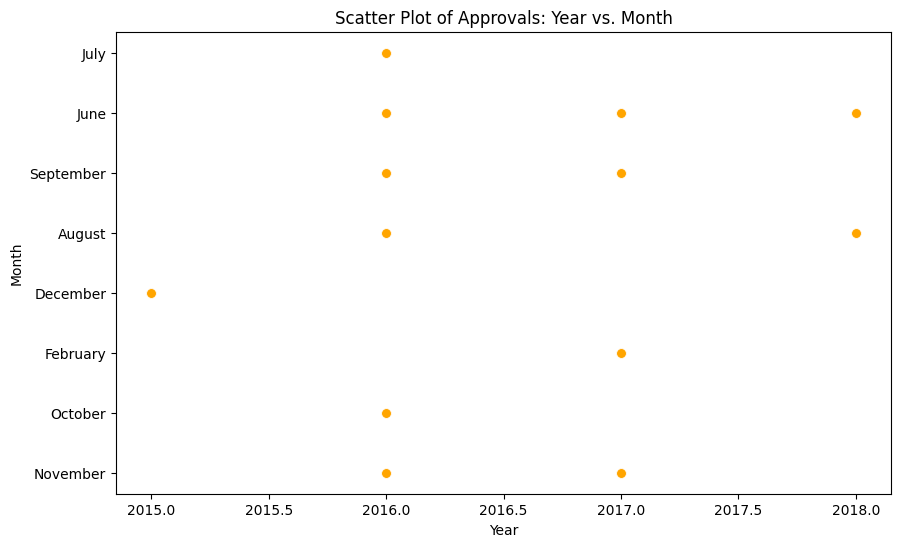

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Approval year', y='Approval month', data=df ,  s=50, color='orange')
plt.title('Scatter Plot of Approvals: Year vs. Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

## **Hard**

---



---



### Network Graph: Stars vs Constellations

---



In [22]:
import networkx as nx
import plotly.graph_objects as go

Splitting the data into 5 parts so that we can visualize it in a better way

In [23]:
split_constellations = np.array_split(df['Constellation'].unique(), 5)

data_parts = [df[df['Constellation'].isin(group)] for group in split_constellations]

df1, df2, df3, df4, df5 = data_parts

Defining the function to make network graphs

In [24]:
def plotNetworkGraph(df, title="Network Graph"):

    G = nx.Graph()
    for _,row in df.iterrows():
        G.add_edge(row['Name'], row['Constellation'])

    pos_2d = nx.spring_layout(G, dim=2, seed=42 , k=0.2)

    edge_x, edge_y = [], []
    for edge in G.edges():
        x0, y0 = pos_2d[edge[0]]
        x1, y1 = pos_2d[edge[1]]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        mode='lines',
        line=dict(color='rgba(169, 169, 169, 0.3)', width=1 ),
        hoverinfo='none'
    )

    node_x, node_y, node_text, node_color = [], [], [], []
    for node in G.nodes():
        x, y = pos_2d[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(node)
        node_color.append('orange' if node in df['Constellation'].unique() else 'skyblue')

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        marker=dict(size=10, color=node_color),
        text=node_text,
        textposition="top center",
        hoverinfo='text'
    )

    fig = go.Figure(data=[edge_trace, node_trace])
    fig.update_layout(
        title=title,
        showlegend=False,
        xaxis=dict(showgrid=False, showticklabels=False, title=''),
        yaxis=dict(showgrid=False, showticklabels=False, title=''),
        margin=dict(l=0, r=0, b=0, t=30)
    )
    fig.show()

Calling the function for each of the df's

In [25]:
plotNetworkGraph(df1, title="Group 1: Constellation Network")
plotNetworkGraph(df2, title="Group 2: Constellation Network")
plotNetworkGraph(df3, title="Group 3: Constellation Network")
plotNetworkGraph(df4, title="Group 4: Constellation Network")
plotNetworkGraph(df5, title="Group 5: Constellation Network")

# **Problem set- 2 (Day-2)**

## 1-Easy ->  Approval Month Trend

In [26]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

present_months = df['Approval month'].unique()
ordered_present_months = [month for month in month_order if month in present_months]
df['Approval month'] = pd.Categorical(df['Approval month'], categories=ordered_present_months, ordered=True)

monthly_approvals = df['Approval month'].value_counts().sort_index()

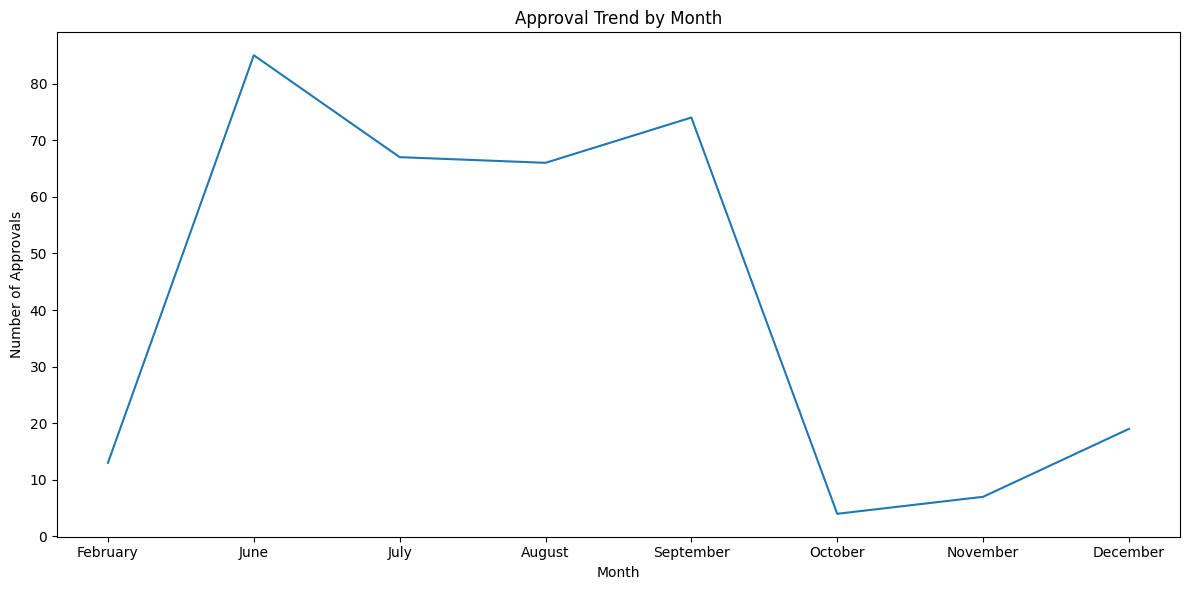

In [27]:
monthly_approvals.plot(kind='line', figsize=(12, 6), title='Approval Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Approvals')
plt.tight_layout()
plt.show()

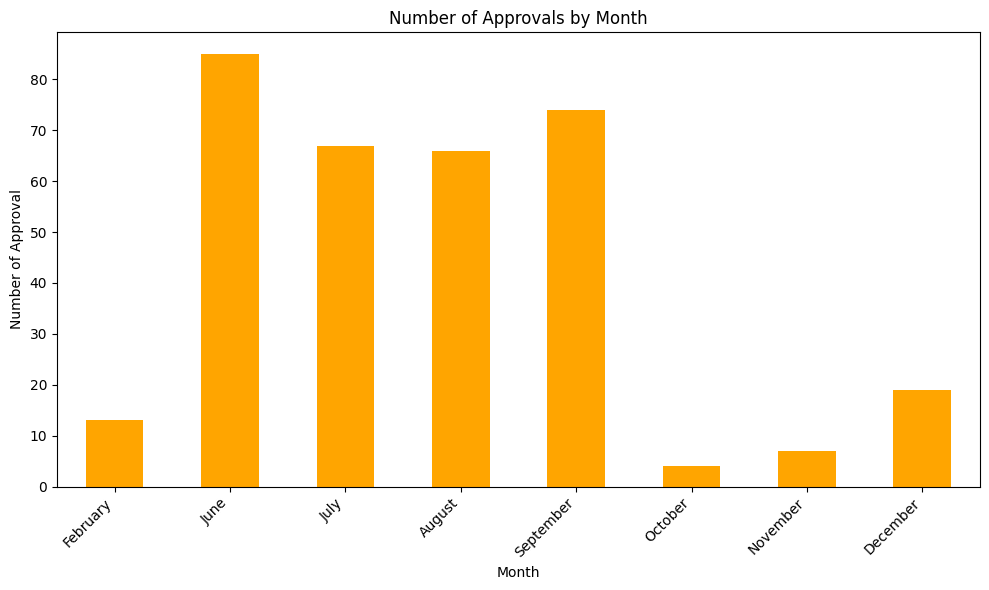

In [28]:
plt.figure(figsize=(10, 6))
monthly_approvals.plot(kind='bar', color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Approval')
plt.title('Number of Approvals by Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 1-Medium ->  5-Year Moving Average of Approvals


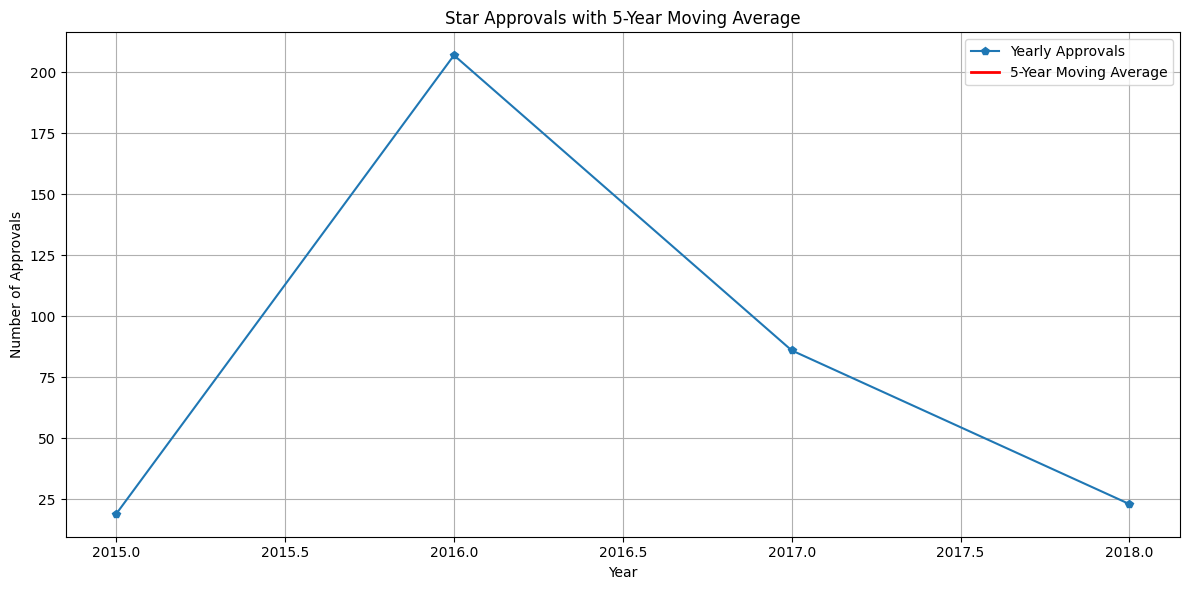

In [52]:
yearly_approvals = df.groupby('Approval year').size()
yearly_approvals
moving_avg = yearly_approvals.rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_approvals.index, yearly_approvals.values, label='Yearly Approvals', marker='p')
plt.plot(moving_avg.index, moving_avg.values, label='5-Year Moving Average', color='red', linewidth=2)
plt.title("Star Approvals with 5-Year Moving Average")
plt.xlabel("Year")
plt.ylabel("Number of Approvals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


5 Year moving average is not possible bcoz of insufficient data so we will use 2 year moving average

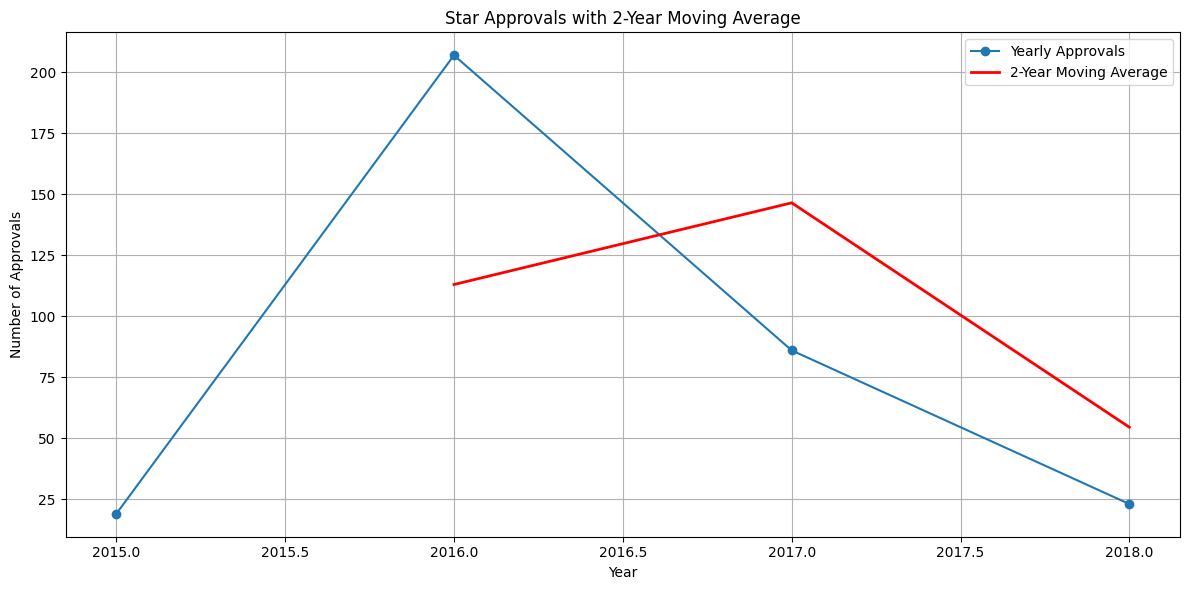

In [29]:
moving_avg = df.groupby('Approval year').size().rolling(window=2).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Approval year').size().index, df.groupby('Approval year').size().values, label='Yearly Approvals', marker='o')
plt.plot(moving_avg.index, moving_avg.values, label='2-Year Moving Average', color='red', linewidth=2)
plt.title("Star Approvals with 2-Year Moving Average")
plt.xlabel("Year")
plt.ylabel("Number of Approvals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2-Medium ->  Approval Density Plot (KDE)

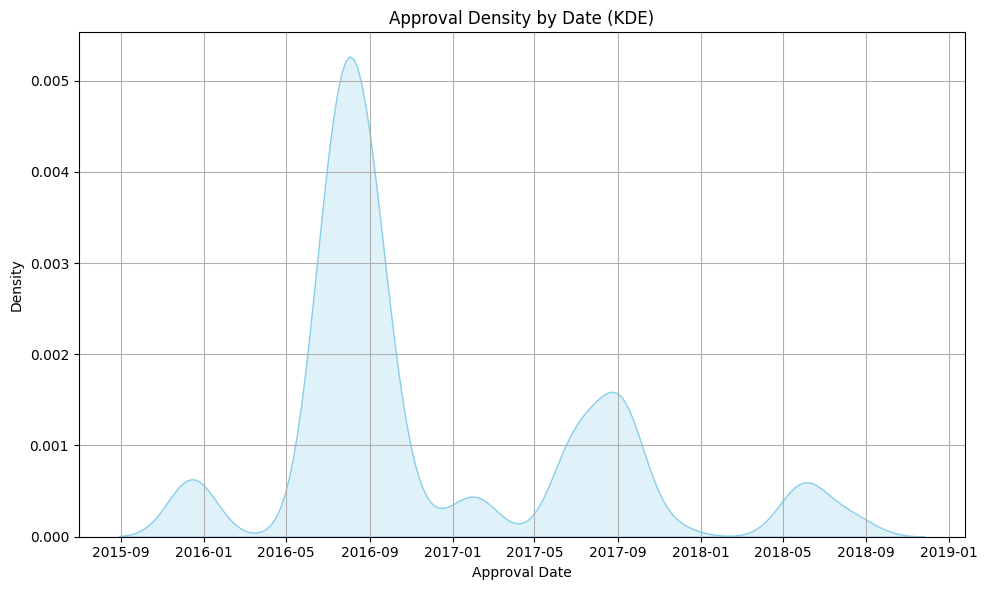

In [50]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Approval Date'], fill=True, color='skyblue',bw_adjust=0.5)
plt.title("Approval Density by Date (KDE)")
plt.xlabel("Approval Date")
plt.ylabel("Density")
plt.tight_layout()
plt.grid(True)
plt.show()

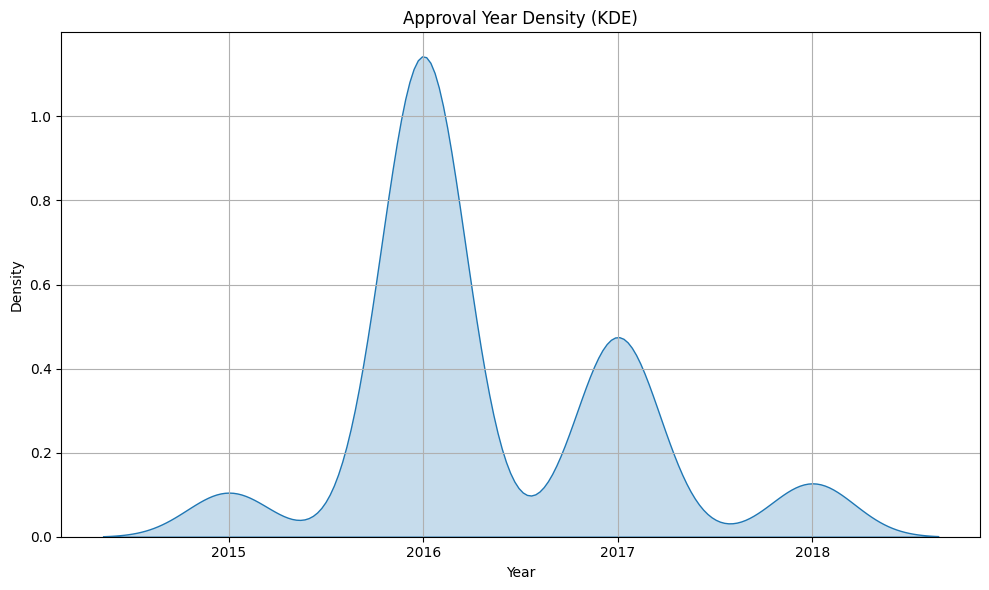

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Approval year'], fill=True)
plt.title('Approval Year Density (KDE)')
plt.xlabel('Year')
plt.ylabel('Density')
plt.tight_layout()
plt.grid(True)
plt.show()

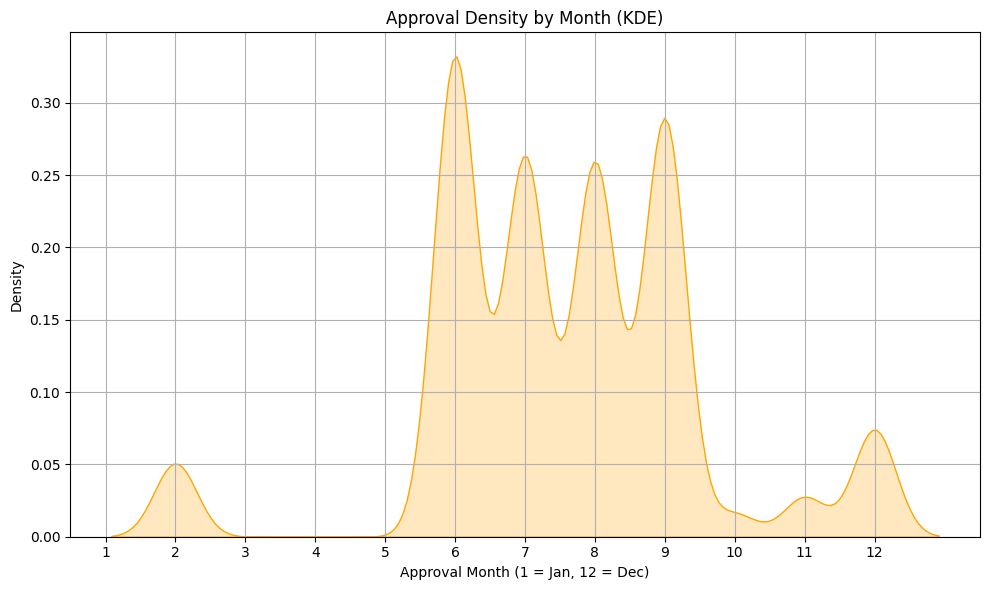

In [46]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Month'], fill=True, color='orange', bw_adjust=0.5)
plt.title("Approval Density by Month (KDE)")
plt.xlabel("Approval Month (1 = Jan, 12 = Dec)")
plt.ylabel("Density")
plt.xticks(ticks=range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

## 1-Hard ->  Outlier Detection on Approval Dates

In [33]:
ordinal_dates = df['Approval Date'].map(pd.Timestamp.toordinal)

Q1 = ordinal_dates.quantile(0.25)
Q3 = ordinal_dates.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df['Approval Date'][(ordinal_dates < lower_bound) | (ordinal_dates > upper_bound)]
print(f"Number of outlier approval dates: {len(outliers)}")

Number of outlier approval dates: 0


In [34]:
lower_quantile =ordinal_dates.quantile(0.01)
upper_quantile =ordinal_dates.quantile(0.99)

outliers = df['Approval Date'][(ordinal_dates < lower_quantile) | (ordinal_dates > upper_quantile)]

print(f"Outliers found: {len(outliers)}")

Outliers found: 0


# Other Problems

---



---



###1.KMean clustering(since its a categorical data we use oneHotEncoding)

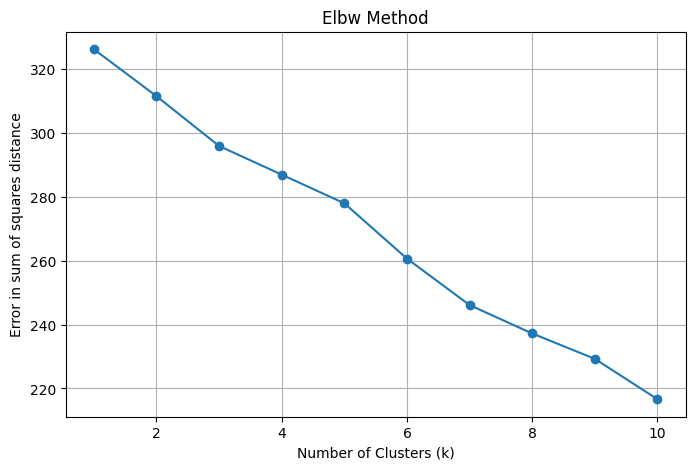

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
cat_data = df[['Constellation']]
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(cat_data)
ssed = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(encoded)
    ssed.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, ssed, marker='o')
plt.title("Elbw Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Error in sum of squares distance")
plt.grid(True)
plt.show()



Constellation_Cluster
0    286
2     16
1     15
4      9
3      9
Name: count, dtype: int64


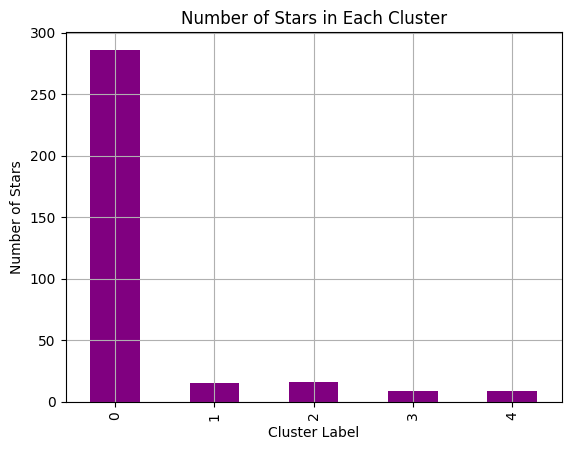

In [36]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Constellation_Cluster'] = kmeans.fit_predict(encoded)
print(df['Constellation_Cluster'].value_counts())

df['Constellation_Cluster'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Number of Stars in Each Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Stars")
plt.grid(True)
plt.show()

In [37]:
# print(df['Constellation'].value_counts().sum())
# df['Constellation'].value_counts()

In [38]:
# df[['Constellation', 'Constellation_Cluster']].drop_duplicates().sort_values('Constellation_Cluster')


## 2-Easy -> Unique Counts Summary

In [39]:
unique_counts = df.nunique().sort_values()

print("Unique Counts Summary : \n" )
print(unique_counts)

Unique Counts Summary : 

Approval year              4
Constellation_Cluster      5
Approval month             8
Month                      8
Approval Date             13
Constellation             63
Name                     335
Designation              335
Bayern Designation       335
dtype: int64


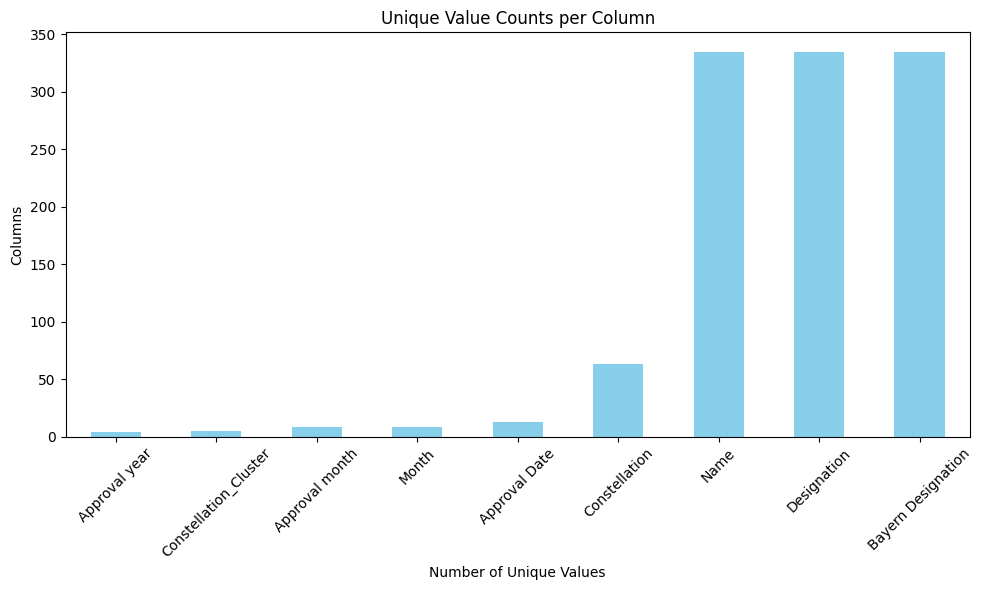

In [40]:
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Value Counts per Column')
plt.xlabel('Number of Unique Values')
plt.ylabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()